Your boss wants to identify those users that in your dataset never went above the monthly credit card limit   alendar  onth . The goal of this is to automatically increase their limit. Can you send him the list of Ids?

On the other hand, she wants you to implement an algorithm that as soon as a user goes above her monthly limit, it triggers an alert so that the user can be notified about that. e assu e here that at the be innin  o  the new  onth, user total  one  s ent  ets reset to  ero  i e  she  a s the  ard  ull  at the end o  ea h  onth   Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.

Finally, your boss is very concerned about frauds cause they are a huge cost for credit card companies. She wants you to implement an unsupervised algorithm that returns all transactions that seem unusual and are worth being investigated further.

In [1]:
import pandas as pd

cc = pd.read_csv('cc_info.csv')
tr = pd.read_csv('transactions.csv')

In [2]:
df = pd.merge(cc, tr, left_on='credit_card', right_on='credit_card')
df.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099


In [3]:
import numpy as np
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [4]:
# distance from average
# distance from previous
# %_of_limit
# time from previous

In [5]:
std_scale = lambda x: (x - x.mean()) / x.std()
df = df.sort_values(by='date')
df['date'] = pd.to_datetime(df['date'])
df['tmp_previous_date']  = df.groupby('credit_card').date.transform('shift')
df['tmp_previous_value'] = df.groupby('credit_card').transaction_dollar_amount.transform('shift')
df['tmp_previous_long']   = df.groupby('credit_card').Long.transform('shift')
df['tmp_previous_lat']  = df.groupby('credit_card').Lat.transform('shift')
df['tmp_distance_previous'] = haversine_np(df['Long'], df['Lat'], df['tmp_previous_long'], df['tmp_previous_lat'])
df['tmp_diff_value_prev'] = df.transaction_dollar_amount - df.tmp_previous_value

In [6]:
df['time_between']     = df.date - df.tmp_previous_date
df['distance_between'] = df.groupby('credit_card').tmp_distance_previous.transform(std_scale)
df['value_limit_rel']  = df.transaction_dollar_amount / df.credit_card_limit
df['value_deviation']  = df.groupby('credit_card').transaction_dollar_amount.transform(std_scale)
df['value_between']    = df.groupby('credit_card').tmp_diff_value_prev.transform(std_scale)
# same city? same state?

In [7]:
df[df.credit_card == 1280981422329509]

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,tmp_previous_date,tmp_previous_value,tmp_previous_long,tmp_previous_lat,tmp_distance_previous,tmp_diff_value_prev,time_between,distance_between,value_limit_rel,value_deviation,value_between
302,1280981422329509,Dallas,PA,18612,6000,2015-07-31 18:13:28,64.38,-75.916714,41.304984,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0.010730,0.093683,NaN
117,1280981422329509,Dallas,PA,18612,6000,2015-07-31 18:39:59,28.71,-75.992077,41.281311,2015-07-31 18:13:28,64.38,-75.916714,41.304984,6.820063,-35.67,0 days 00:26:31,-0.119019,0.004785,-0.201594,-0.205276
57,1280981422329509,Dallas,PA,18612,6000,2015-07-31 20:43:34,857.56,-75.938646,41.385103,2015-07-31 18:39:59,28.71,-75.992077,41.281311,12.365619,828.85,0 days 02:03:35,-0.113576,0.142927,6.659634,4.796003
256,1280981422329509,Dallas,PA,18612,6000,2015-08-01 20:03:53,25.97,-75.974792,41.349520,2015-07-31 20:43:34,857.56,-75.938646,41.385103,4.972214,-831.59,0 days 23:20:19,-0.120833,0.004328,-0.224276,-4.809701
89,1280981422329509,Dallas,PA,18612,6000,2015-08-02 00:16:57,51.85,-75.892793,41.341462,2015-08-01 20:03:53,25.97,-75.974792,41.349520,6.899198,25.88,0 days 04:13:04,-0.118941,0.008642,-0.010041,0.150793
90,1280981422329509,Dallas,PA,18612,6000,2015-08-02 00:16:58,39.14,-75.942079,41.359162,2015-08-02 00:16:57,51.85,-75.892793,41.341462,4.557678,-12.71,0 days 00:00:01,-0.121240,0.006523,-0.115254,-0.072451
91,1280981422329509,Dallas,PA,18612,6000,2015-08-02 00:16:59,35.83,-76.022084,41.386997,2015-08-02 00:16:58,39.14,-75.942079,41.359162,7.353885,-3.31,0 days 00:00:01,-0.118495,0.005972,-0.142654,-0.018072
267,1280981422329509,Dallas,PA,18612,6000,2015-08-02 16:59:28,11.30,-75.908627,41.346133,2015-08-02 00:16:59,35.83,-76.022084,41.386997,10.495466,-24.53,0 days 16:42:29,-0.115411,0.001883,-0.345714,-0.140830
201,1280981422329509,Dallas,PA,18612,6000,2015-08-02 18:07:53,33.87,-75.915492,41.328078,2015-08-02 16:59:28,11.30,-75.908627,41.346133,2.086418,22.57,0 days 01:08:25,-0.123666,0.005645,-0.158879,0.131645
299,1280981422329509,Dallas,PA,18612,6000,2015-08-02 19:07:16,80.09,-75.992506,41.425310,2015-08-02 18:07:53,33.87,-75.915492,41.328078,12.569274,46.22,0 days 00:59:23,-0.113376,0.013348,0.223730,0.268461


In [8]:
fts = ['time_between', 'distance_between', 'value_limit_rel', 'value_deviation', 'value_between']
vals = df[]
vals = vals.dropna()
vals['time_between'] = vals['time_between'].dt.seconds

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110309b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110cbe090>]], dtype=object)

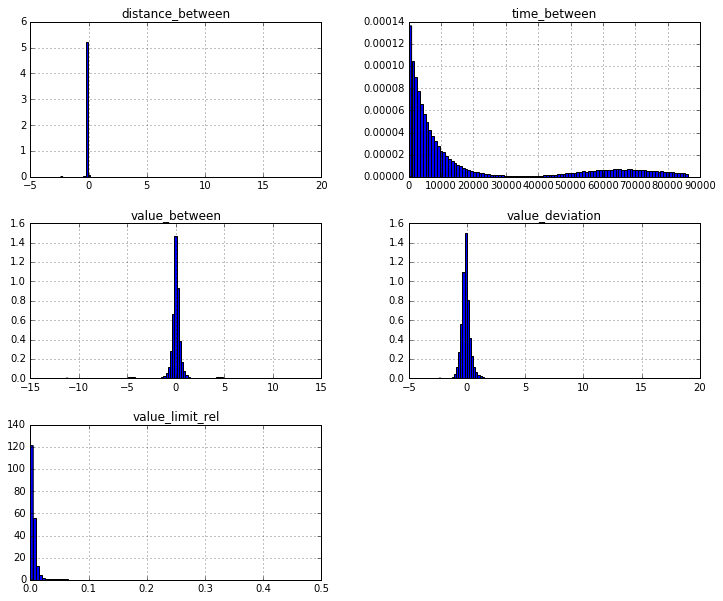

In [9]:
%matplotlib inline
vals.hist(bins=100, normed=True, figsize=(12,10))

In [10]:
vals.describe()

,time_between,distance_between,value_limit_rel,value_deviation,value_between
count,293601.000000,2.936010e+05,2.936010e+05,293601.000000,2.936010e+05
mean,18638.550959,-1.161646e-18,6.598264e-03,-0.000008,-1.452058e-19
std,25408.848482,9.983348e-01,1.307516e-02,0.998161,9.983348e-01
min,0.000000,-2.393870e+00,2.857143e-07,-2.412378,-1.132134e+01
25%,2172.000000,-1.854941e-01,2.338333e-03,-0.323753,-1.893603e-01
50%,6013.000000,-1.625738e-01,4.110000e-03,-0.143472,3.329705e-04
75%,18896.000000,-1.357060e-01,6.700714e-03,0.062784,1.901759e-01
max,86399.000000,1.541511e+01,4.966000e-01,15.943140,1.145993e+01


In [22]:
from sklearn.cluster import *
import seaborn as sns

def best_km(k, trials=30):
    best_scr = None
    best_model = None
    for i in range(trials):
        km = KMeans(n_clusters=k, n_jobs=4).fit(vals[fts])
        if not best_scr or best_scr > km.inertia_:
            best_scr = km.inertia_
            best_model = km
    return best_model


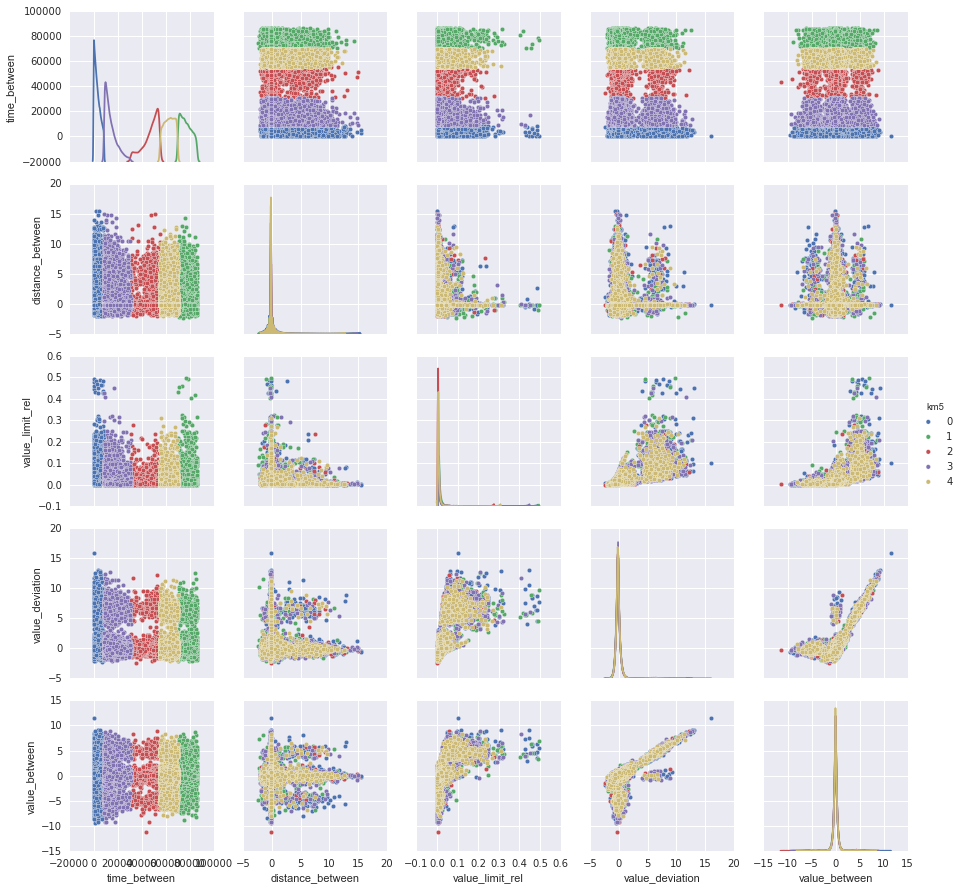

In [19]:
vals['km5'] = best_km(5).labels_
sns.pairplot(vals, diag_kind="kde", hue='km5',vars=fts)

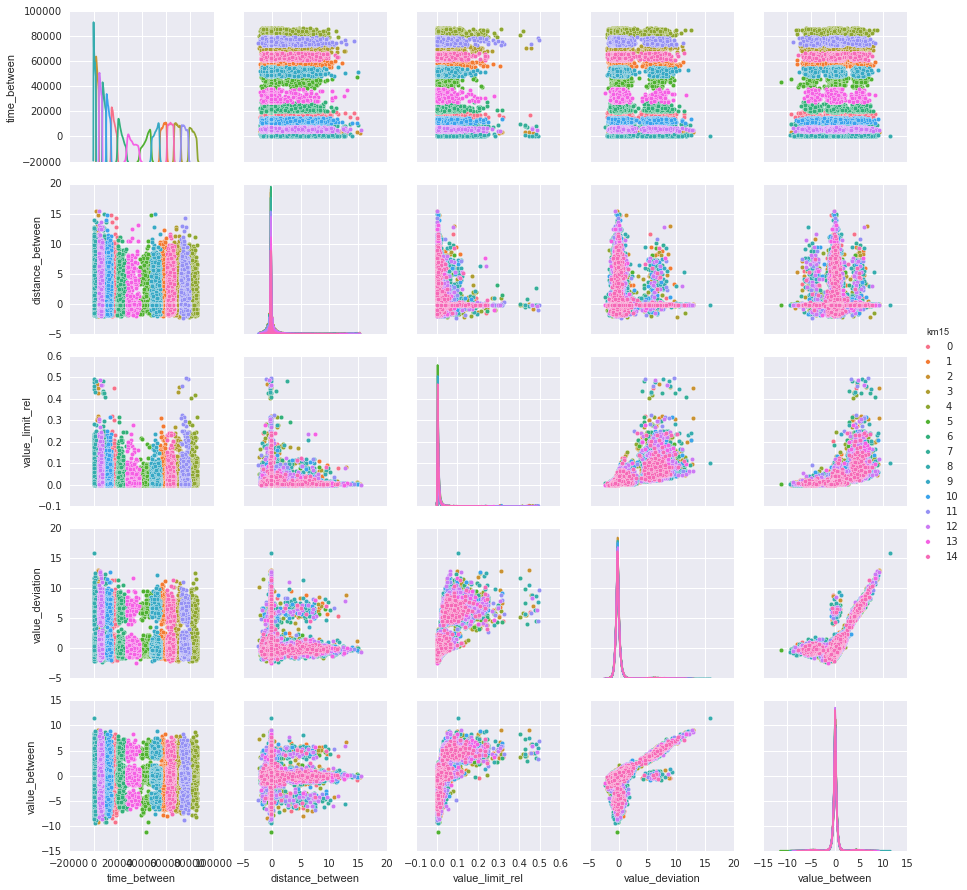

In [26]:

vals['km15'] = best_km(15).labels_
sns.pairplot(vals, diag_kind="kde", hue='km15',vars=fts)

In [42]:
db = DBSCAN(min_samples=25, eps=0.3).fit(vals[fts])
len(np.unique(db.labels_))

57

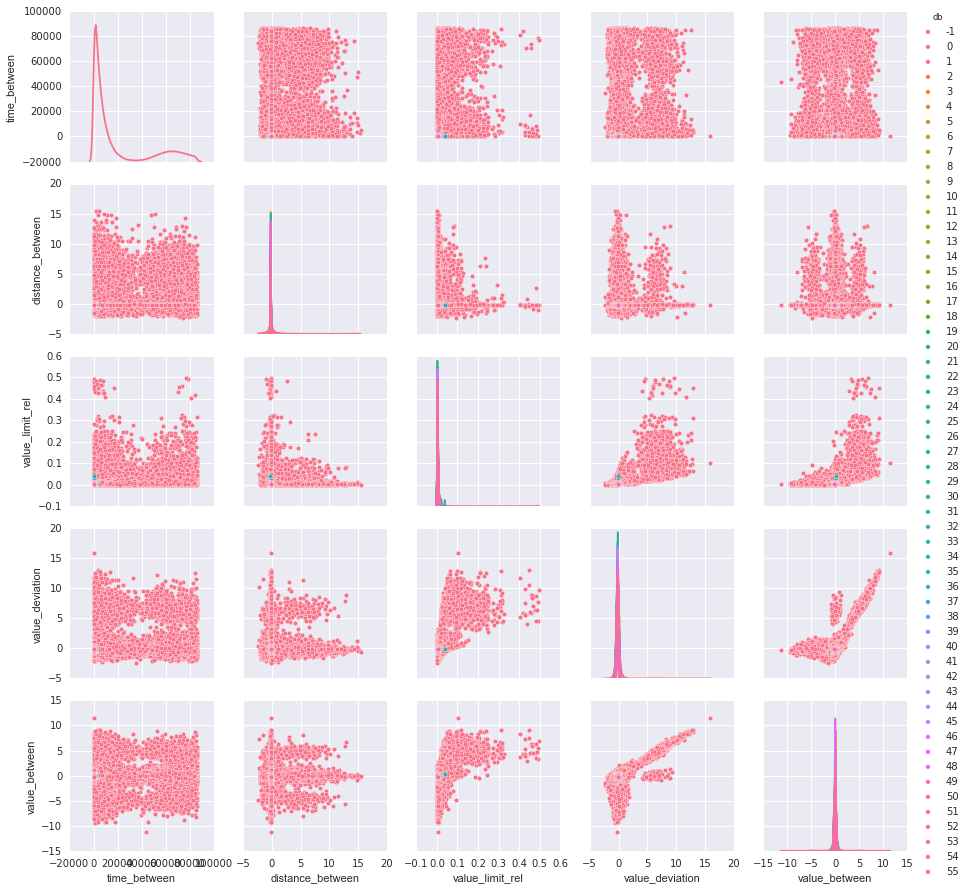

In [43]:
vals['db'] = db.labels_
sns.pairplot(vals, diag_kind="kde", hue='db',vars=fts)

In [ ]:
br = Birch().fit(vals[fts])
len(np.unique(br.labels_))